<a href="https://colab.research.google.com/github/allaouaabdelhak25-blip/Allaoua_Abdelhak/blob/main/Allaoua_Abdelhak/Allaoua_Mohamed_Abdelhak__AutoML_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Age  Annual Income (k$)  Spending Score (1-100)
0  26.490142           33.692333               18.901641
1  24.585207           30.856841               21.785563
2  26.943066           29.421759               27.389470
3  29.569090           28.494482               17.408649
4  24.297540           22.607390               15.957532


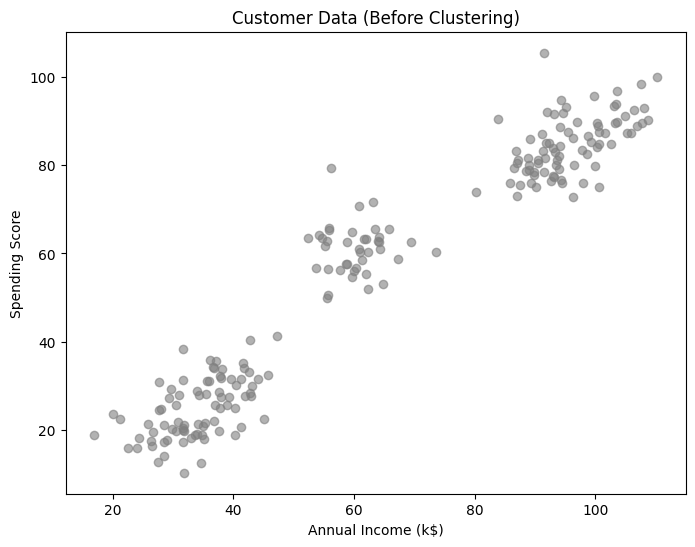

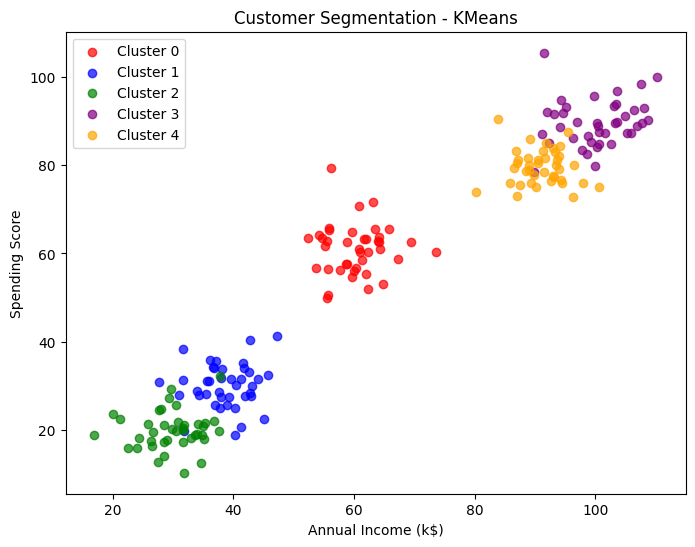

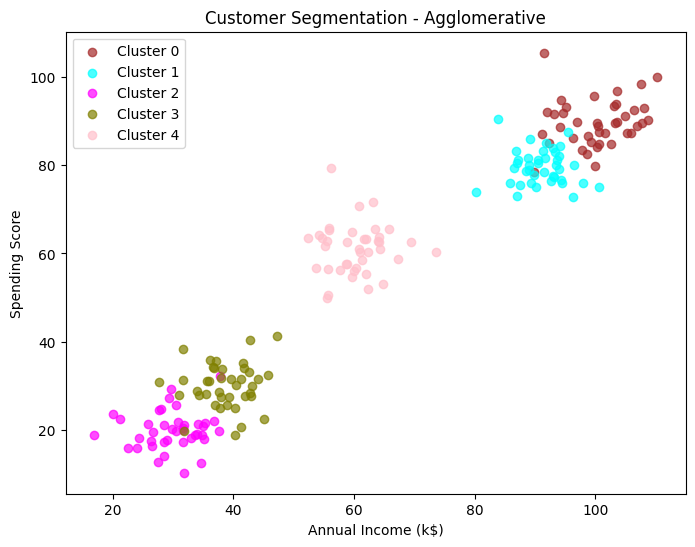


Moyennes par cluster (K-Means):

                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               34.901300           60.332761               60.947202
1               59.526714           38.643982               30.133470
2               24.344089           29.854783               20.050866
3               28.631814          100.268643               89.601339
4               49.672983           91.097544               79.593962
         V1        V2        V3        V4        V5        V6        V7  \
0  0.756989 -0.922165  0.869606  1.355638  0.413435  1.876796 -0.773789   
1  0.654366 -0.055585  0.279969 -1.125489  2.445752  0.129221  0.109395   
2 -0.790474  0.471468  1.882024  1.345420  1.593187 -0.511216 -0.989605   
3 -1.692465  1.529550 -0.158008 -0.426881 -1.012104 -1.654857  0.823171   
4 -0.335785  1.669022 -0.259591 -1.503143 -0.245743 -0.272724 -2.696887   

         V8        V9    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== Random Forest ===
Accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1460
           1       0.00      0.00      0.00        40

    accuracy                           0.97      1500
   macro avg       0.49      0.50      0.49      1500
weighted avg       0.95      0.97      0.96      1500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


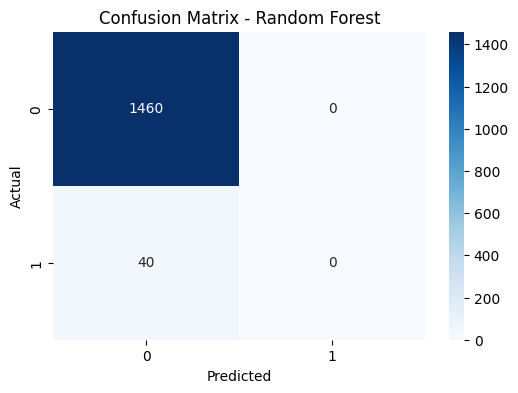

ModuleNotFoundError: No module named 'tpot'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


# ================= Projet 1 : Customer Segmentation ========

# 1) Create of donnees simulees
clusters_info = [
    {"center": [25, 30, 20], "size": 40},
    {"center": [35, 60, 60], "size": 40},
    {"center": [50, 90, 80], "size": 40},
    {"center": [28, 100, 90], "size": 40},
    {"center": [60, 40, 30], "size": 40},
]

data_list = []
for cluster in clusters_info:
    age = np.random.normal(cluster["center"][0], 3, cluster["size"])
    income = np.random.normal(cluster["center"][1], 5, cluster["size"])
    spending = np.random.normal(cluster["center"][2], 5, cluster["size"])
    data_list.append(np.column_stack((age, income, spending)))

data_array = np.vstack(data_list)
data = pd.DataFrame(data_array, columns=['Age','Annual Income (k$)','Spending Score (1-100)'])

print(data.head())

# 2) Visualisation initiale
plt.figure(figsize=(8,6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color='gray', alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Data (Before Clustering)")
plt.show()

# 3) Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 4) K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
colors_kmeans = ['red','blue','green','purple','orange']
for i in range(5):
    cluster_data = data[data['KMeans_Cluster']==i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                color=colors_kmeans[i], label=f'Cluster {i}', alpha=0.7)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation - KMeans")
plt.legend()
plt.show()

# 5) Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
data['Agglomerative_Cluster'] = agg.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
colors_agg = ['brown','cyan','magenta','olive','pink']
for i in range(5):
    cluster_data = data[data['Agglomerative_Cluster']==i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                color=colors_agg[i], label=f'Cluster {i}', alpha=0.7)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation - Agglomerative")
plt.legend()
plt.show()

# 6) Analyse of clusters
print("\nMoyennes par cluster (K-Means):\n")
print(data.groupby('KMeans_Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean())


# ================= Projet 2 : Credit Card Fraud ============


# 1) Creation of donnees simulees (fraude rare)
n_samples = 5000
X = np.random.randn(n_samples, 10)
y = np.random.choice([0,1], size=n_samples, p=[0.97,0.03]) # 3% fraude
fraud_data = pd.DataFrame(X, columns=[f'V{i}' for i in range(1,11)])
fraud_data['Class'] = y
print(fraud_data.head())

# 2) Separation Train/Test
X = fraud_data.drop('Class', axis=1)
y = fraud_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)




# 3) Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4) Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 5) Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 6) Confusion Matrix (Random Forest)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


# ================= AutoML (TPOT) ===========================


from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=3, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print("AutoML Accuracy:", tpot.score(X_test, y_test))